In [39]:
from numpy import where
import pandas as pd
from sklearn.datasets import make_classification
# from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go

le = LabelEncoder()

In [40]:
df = pd.read_csv('for_clustering_math_outputs.csv')
df.head()

,Unnamed: 0,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean
0,0,s_320_045_split_1,s,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542
1,1,s_320_015_split_0,s,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,119.866400,696.665119,0.406478
2,2,s_320_020_split_3,s,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598804,-1207.787922,0.159834
3,3,c_770_005_split_3,c,0.005414,0.040638,0.040996,0.898666,4733.248435,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862463,-845.862907,6.028744
4,4,c_770_002_split_0,c,0.005469,0.014140,0.015160,3.312443,1899.488742,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575105,959.974401,1.305385


In [41]:
df['chatter_presence'] = le.fit_transform(df['chatter_presence'])
df.head() # s = 2; c = 0; i = 1

,Unnamed: 0,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean
0,0,s_320_045_split_1,2,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542
1,1,s_320_015_split_0,2,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,119.866400,696.665119,0.406478
2,2,s_320_020_split_3,2,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598804,-1207.787922,0.159834
3,3,c_770_005_split_3,0,0.005414,0.040638,0.040996,0.898666,4733.248435,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862463,-845.862907,6.028744
4,4,c_770_002_split_0,0,0.005469,0.014140,0.015160,3.312443,1899.488742,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575105,959.974401,1.305385


In [42]:
X = df[df.columns[3:]]
X = (X-X.mean())/X.std()
X

,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean
0,0.419092,-0.387855,-0.343828,-0.543594,2.372387,-0.352784,-0.287060,-0.249321,-0.305287,-0.334049,-0.313303,1.108740,1.165005,0.017275
1,0.218891,-0.421168,-0.359254,-0.290278,0.533177,-0.009488,-0.271687,1.629970,1.004416,0.697047,0.052101,0.038750,0.240453,-0.157921
2,0.666587,-0.439060,-0.363414,-0.830349,1.075339,-0.489198,-0.259862,-1.091868,-0.932836,-0.854317,-0.488428,-0.047948,-0.432126,-0.362651
3,-1.415326,5.873018,6.210966,0.389905,-0.178393,5.710813,6.591457,2.001389,1.943661,1.908804,5.568797,-0.347094,-0.304308,4.508903
4,0.047353,1.547417,1.380174,1.813164,-1.047872,1.798902,0.849185,2.308096,2.554142,2.654666,1.584778,0.333351,0.333444,0.588227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,-0.087698,0.001977,-0.110208,0.685985,-1.022290,-0.070162,-0.221239,0.429045,0.391719,0.360548,-0.043112,-0.169732,-0.754998,-0.344143
360,-0.005796,-0.343902,-0.326220,0.689400,-0.916144,-0.232976,-0.288454,0.376982,0.163826,0.059110,-0.177538,0.971538,1.609855,-0.372955
361,-0.121391,-0.496528,-0.389159,-0.349919,-0.015042,-0.436319,-0.249933,-0.558348,-0.585073,-0.591257,-0.393276,-0.313802,-0.628945,-0.314495
362,0.411365,-0.110793,-0.187473,0.957125,-0.545511,-0.075086,-0.240146,0.374255,0.282422,0.224782,-0.099952,-1.350559,-1.649137,-0.226813


C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Text(0, 0.5, 'WCSS')

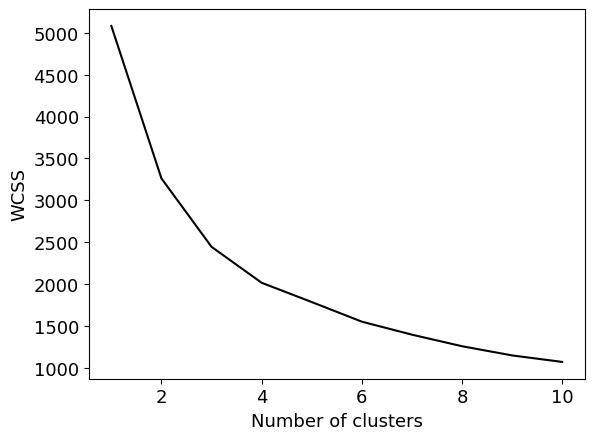

In [43]:
wcss = []
plt.rcParams.update({'font.size': 13})
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, c = 'k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [44]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
df['cluster'] = y_kmeans

C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
# df['cluster'] = y_kmeans
# df.head(40)
# df[['chatter_presence', 'cluster']][df['chatter_presence'] == 2].sum()

In [46]:
# temp = 83/200*100
# temp

existem 200 arquivos classificados como sem chatter

83 deles estão sendo mal classificados como com chatter pelo Kmeans

41,5% está sendo mal classificado


In [47]:
df.chatter_presence.value_counts()

chatter_presence
2    200
0     88
1     76
Name: count, dtype: int64

In [48]:
df.cluster.value_counts()

cluster
0    352
1     12
Name: count, dtype: int64

In [49]:
df.to_csv('kmeans_output_daniel.csv')

In [50]:
import pandas as pd
# hoje = pd.read_csv('kmeans_output_26-05.csv')